


# Model 2 Fine Tuning


**Name:** Kavin Fidel <br>

**ID.:** 210200007 <br>
**Model** EfficientNetV2B0


In [1]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(41)

import numpy as np
np.random.seed(41)

import matplotlib.pyplot as plt
%matplotlib inline

2.15.0


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# load numpy array from npy file
from numpy import load

X_train_std = load("/content/drive/MyDrive/Deep Learning/Models/X_train2_std.npy")
X_test_std = load("/content/drive/MyDrive/Deep Learning/Models/X_test2_std.npy")

y_train = load("/content/drive/MyDrive/Deep Learning/Models/y_train2.npy")
y_test = load("/content/drive/MyDrive/Deep Learning/Models/y_test2.npy")


In [4]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (637, 299, 299, 3)
X_test_std_shape: (213, 299, 299, 3)


## Load the model from Model1_TL
- We apply fine tuning on this model

In [5]:


model2_FT = keras.models.load_model("/content/drive/MyDrive/Deep Learning/Models/Model2_TL.h5")
model2_FT.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalization[0][0]']   

In [6]:
tot_layers = len(model2_FT.layers)
freeze_layer = round(tot_layers * 0.25)

for layer in model2_FT.layers[:freeze_layer]:
  layer.trainable = False

for layer in model2_FT.layers[freeze_layer:]:
  layer.trainable = True


In [7]:
model2_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks2_FT = [
             keras.callbacks.ModelCheckpoint("bestFT2.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history2_FT = model2_FT.fit(x = X_train_std, y = y_train, epochs=10,
                                      validation_split=0.1, batch_size=16, callbacks=callbacks2_FT)

Epoch 1/10
36/36 [==============================] - 51s 293ms/step - loss: 0.7547 - accuracy: 0.7749 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 2/10
36/36 [==============================] - 5s 127ms/step - loss: 0.3519 - accuracy: 0.8883 - val_loss: 0.0357 - val_accuracy: 0.9844
Epoch 3/10
36/36 [==============================] - 5s 128ms/step - loss: 0.1395 - accuracy: 0.9529 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/10
36/36 [==============================] - 5s 137ms/step - loss: 0.1221 - accuracy: 0.9651 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 5/10
36/36 [==============================] - 5s 132ms/step - loss: 0.1455 - accuracy: 0.9634 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/10
36/36 [==============================] - 5s 133ms/step - loss: 0.0888 - accuracy: 0.9668 - val_loss: 5.0475e-05 - val_accuracy: 1.0000
Epoch 7/10
36/36 [==============================] - 5s 141ms/step - loss: 0.0487 - accuracy: 0.9860 - val_loss: 0.0011 - val_accuracy: 1.0000
E

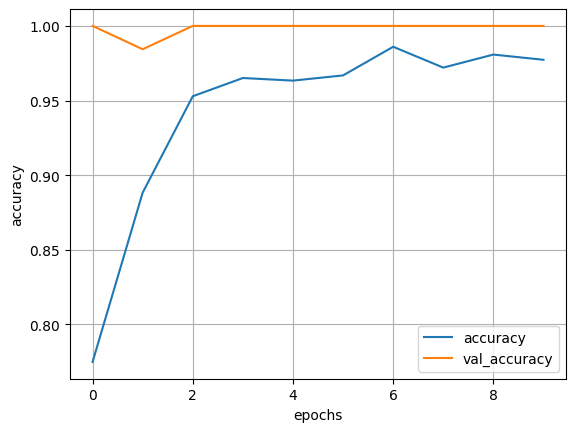

In [8]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history2_FT.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [9]:
testLoss_FT, testAccuracy_FT = model2_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FT, testAccuracy_FT))

7/7 [==============================] - 7s 382ms/step - loss: 0.0367 - accuracy: 0.9953
Test-loss: 0.036653, Test-accuracy: 0.995305


In [10]:


model2_FT.load_weights("bestFT2.h5")

testLoss_FT, testAccuracy_FT = model2_FT.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FT, testAccuracy_FT))

7/7 [==============================] - 1s 83ms/step - loss: 0.0575 - accuracy: 0.9812
Test-loss: 0.057485, Test-accuracy: 0.981221


## Prediction of testing sample and inferences

In [11]:
y_proba = model2_FT.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

7/7 [==============================] - 2s 87ms/step
[4 4 2 3 3 0 4 1 1 3 1 1 0 4 4 4 0 0 2 2 1 0 2 0 4 1 4 1 0 4 0 2 0 4 0 2 2
 4 0 0 1 2 2 4 2 1 1 3 2 4 4 3 2 4 3 1 1 0 2 0 2 2 4 0 2 2 0 2 1 0 3 3 4 3
 1 2 0 0 4 4 0 2 0 0 2 4 1 0 4 1 2 4 2 3 4 2 0 4 0 3 3 1 1 4 3 1 2 4 4 1 1
 0 1 1 2 0 2 1 1 3 4 1 2 0 4 2 0 0 2 2 0 1 0 2 4 0 3 0 0 1 4 4 0 1 4 3 2 4
 0 3 1 1 1 1 2 0 0 1 3 4 3 1 4 2 1 4 0 4 2 1 0 1 0 2 1 2 1 0 2 2 0 0 0 0 3
 0 3 2 0 4 1 4 2 0 1 2 2 1 1 1 2 2 0 3 0 2 1 1 4 3 2 1 2]


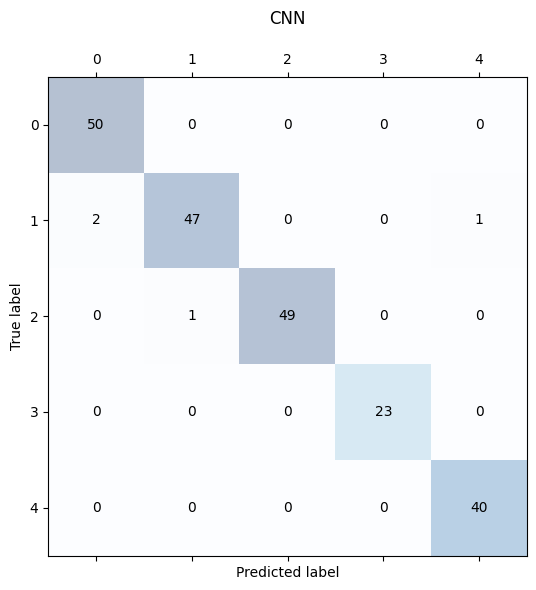

In [12]:


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [13]:


from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

Precision:  0.9815006885171778
Recall:  0.9812206572769953
F1-score:  0.9811263561082737


In [14]:

model2_FT.save("/content/drive/MyDrive/Deep Learning/Models/Fine_Tuned/Model2_FT.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
